# **Neural Networks**

## **1.Feed Forward Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

In [ ]:
# Load and prepare the MNIST dataset

mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Build the model

model = Sequential([Flatten(input_shape=(28,28)),
                    Dense(128,activation='relu'),
                    Dense(10,activation='softmax')])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model

model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=[SparseCategoricalAccuracy()])

In [ ]:
# Train the model

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.4338 - sparse_categorical_accuracy: 0.8781
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.1203 - sparse_categorical_accuracy: 0.9646
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0772 - sparse_categorical_accuracy: 0.9774
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0543 - sparse_categorical_accuracy: 0.9840
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0415 - sparse_categorical_accuracy: 0.9872


In [ ]:
# Evaluate the model

test_loss ,test_acc = model.evaluate(x_test,y_test)
print(f'\nTest Accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0936 - sparse_categorical_accuracy: 0.9707

Test Accuracy: 0.9751999974250793


## **2.Convolutional Neural Networks (CNNs)**

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

In [ ]:
# set the param

plt.rc('figure' , autolayout=True)
plt.rc('image', cmap='magma')

In [ ]:
# define the kernel

kernel = tf.constant([[-1,-1,-1],
                  [-1,8,-1],[-1,-1,-1]])

In [ ]:
# load the image

image = tf.io.read_file("/content/drive/MyDrive/Colab Notebooks/cute-baby.jpg")
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300,300])

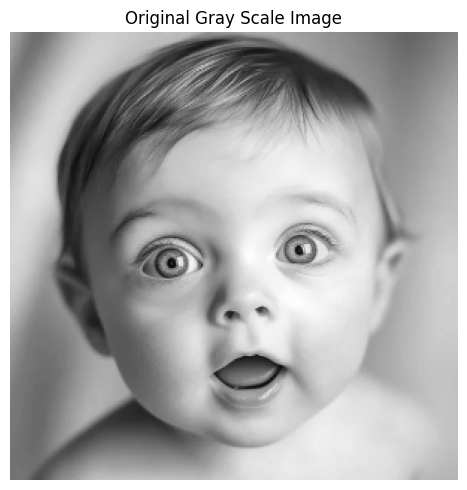

In [ ]:
# plot the image

img = tf.squeeze(image).numpy()
plt.figure(figsize=(5,5))
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale Image')
plt.show();

In [ ]:
# reformat

image =  tf.image.convert_image_dtype(image,dtype=tf.float32)
image = tf.expand_dims(image,axis=0)
kernel = tf.reshape(kernel,[*kernel.shape,1,1])
kernel = tf.cast(kernel,dtype=tf.float32)

In [ ]:
# convolution layer

conv_fn = tf.nn.conv2d

image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1, # or (1,1,)
    padding='SAME',
)

plt.figure(figsize=(15,5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Convolution')

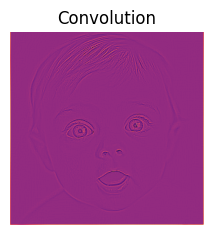

In [ ]:
# plot the covolved image

plt.subplot(1,3,1)

plt.imshow(tf.squeeze(image_filter))

plt.axis('off')
plt.title('Convolution')

In [ ]:
# activation layer

relu_fn = tf.nn.relu

In [ ]:
# image detection

image_detect = relu_fn(image_filter)

Text(0.5, 1.0, 'Activation')

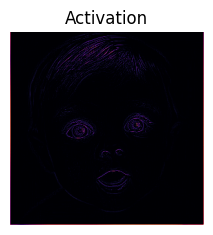

In [ ]:
plt.subplot(1,3,2)
plt.imshow(tf.squeeze(image_detect)) # reformat for plotting

plt.axis('off')
plt.title('Activation')

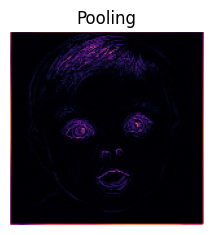

In [ ]:
# pooling layer

pool = tf.nn.pool
image_condense = pool(input=image_detect,
                             window_shape=(2, 2),
                             pooling_type='MAX',
                             strides=(2, 2),
                             padding='SAME',
                            )

plt.subplot(1,3,3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()

### **CNN Basics**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train) , (x_test,y_test) = datasets.cifar10.load_data()

If a pixel was 0 → 0 / 255 = 0

If a pixel was 255 → 255 / 255 = 1

If a pixel was 128 → 128 / 255 ≈ 0.50

In [ ]:
x_train , x_test = x_train/255 , x_test/255 #normal pixel values to between 0 and 1

.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3))

Conv2D creates a convolutional layer.

32 means it will learn 32 filters (feature maps).

(3,3) is the size of each filter (kernel) — a 3×3 grid.

activation="relu" applies the ReLU activation function to introduce non-linearity.

input_shape=(32,32,3) sets the input image dimensions:

32×32

3 channels (RGB image)

In [ ]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="adam", # compile model
              loss="sparse_categorical_crossentropy",
              metrics=['Accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=20, #train the model
                    validation_data=(x_test,y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 72ms/step - Accuracy: 0.3459 - loss: 1.7579 - val_Accuracy: 0.5569 - val_loss: 1.2313
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - Accuracy: 0.5679 - loss: 1.2109 - val_Accuracy: 0.6231 - val_loss: 1.0638
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - Accuracy: 0.6433 - loss: 1.0161 - val_Accuracy: 0.6571 - val_loss: 0.9728
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - Accuracy: 0.6795 - loss: 0.9125 - val_Accuracy: 0.6655 - val_loss: 0.9690
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - Accuracy: 0.7044 - loss: 0.8394 - val_Accuracy: 0.6849 - val_loss: 0.9043
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - Accuracy: 0.7296 - loss: 0.7695 - val_Accuracy: 0.6842 - val_loss: 0.9220
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - Accuracy: 0.7488 - loss: 0.7179 - val_Accuracy: 0.6932 - val_loss: 0.8868
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - Accuracy: 0.7646 

In [ ]:
test_loss , test_acc = model.evaluate(x_test ,y_test) # evaluate the model
print(f"Test Accuracy: {test_acc:.6f}")

### **CNN with plotting**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 1. Load and Preprocess the CIFAR-10 dataset

(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
x_train,x_test = x_train/255.0 , x_test/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
# Class names for CIFAR-10

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [ ]:
# 2. Build the CNN model

model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 3. Compile the model

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['Accuracy'])

In [ ]:
# 4. Train the model

history = model.fit(x_train,y_train,epochs=10,
                    validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 64ms/step - Accuracy: 0.3285 - loss: 1.8117 - val_Accuracy: 0.5211 - val_loss: 1.3650
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 68ms/step - Accuracy: 0.5654 - loss: 1.2204 - val_Accuracy: 0.6049 - val_loss: 1.1143
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - Accuracy: 0.6327 - loss: 1.0378 - val_Accuracy: 0.6337 - val_loss: 1.0412
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 196s 90ms/step - Accuracy: 0.6748 - loss: 0.9275 - val_Accuracy: 0.6606 - val_loss: 0.9776
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 79ms/step - Accuracy: 0.7025 - loss: 0.8434 - val_Accuracy: 0.6571 - val_loss: 0.9941
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 64ms/step - Accuracy: 0.7319 - loss: 0.7674 - val_Accuracy: 0.7098 - val_loss: 0.8375
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 46ms/step - Accuracy: 0.7487 - loss: 0.7158 - val_Accuracy: 0.7040 - val_loss: 0.8592
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 47ms/step - Accuracy: 0.

In [ ]:
# 5. Evaluate the model

test_loss , test_acc = model.evaluate(x_test ,y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - Accuracy: 0.7196 - loss: 0.8457

Test Accuracy: 0.7138


In [ ]:
# 6. Predict on test images

predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


/tmp/ipython-input-3711012462.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_label = class_names[int(y_test[index])]


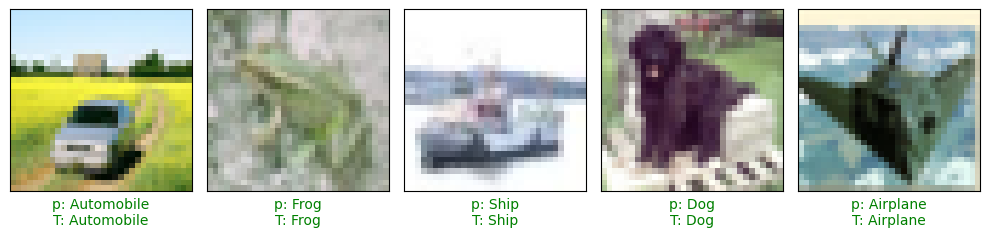

In [ ]:
# 7. Display predictions for 5 random test images

num_images = 5
plt.figure(figsize=(10,5))

for i in range(num_images):
  index = np.random.randint(0, len(x_test))
  plt.subplot(1, num_images, i+1)
  plt.xticks([]); plt.yticks([]); plt.grid(False)
  plt.imshow(x_test[index])

  predicted_label = class_names[np.argmax(predictions[index])] # to take high probability-use argmax
  true_label = class_names[int(y_test[index])]

  color= 'green' if predicted_label == true_label else 'red'
  plt.xlabel(f"p: {predicted_label}\nT: {true_label}", color=color)

plt.tight_layout()
plt.show()

## **3.Recurrent Neural Networks (RNNs)**

**Step 1: Import Necessary Libraries**

We start by importing essential libraries for data handling and building the neural network.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

<b>Step 2: Define the Input Text and Prepare Character Set </b> <br>
We define the input text and identify unique characters in the text which we’ll encode for our model.

In [ ]:
text = "This is GeeksforGeeks a software training institute"
chars = sorted(list(set(text)))
char_to_index = {char: i for i, char in enumerate(chars)}
index_to_char = {i: char for i, char in enumerate(chars)}

In [ ]:
chars

[' ',
 'G',
 'T',
 'a',
 'e',
 'f',
 'g',
 'h',
 'i',
 'k',
 'n',
 'o',
 'r',
 's',
 't',
 'u',
 'w']

In [ ]:
char_to_index

{' ': 0,
 'G': 1,
 'T': 2,
 'a': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'k': 9,
 'n': 10,
 'o': 11,
 'r': 12,
 's': 13,
 't': 14,
 'u': 15,
 'w': 16}

In [ ]:
index_to_char

{0: ' ',
 1: 'G',
 2: 'T',
 3: 'a',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'k',
 10: 'n',
 11: 'o',
 12: 'r',
 13: 's',
 14: 't',
 15: 'u',
 16: 'w'}

**Step 3: Create Sequences and Labels** <br>
To train the RNN, we need sequences of fixed length (seq_length) and the character following each sequence as the label.

In [ ]:
seq_length = 3
sequences = []
labels = []

for i in range(len(text) - seq_length):
  seq = text[i:i + seq_length]
  label = text[i + seq_length]
  sequences.append([char_to_index[char] for char in seq])
  labels.append(char_to_index[label])

x = np.array(sequences)
y = np.array(labels)

In [ ]:
sequences

[[2, 7, 8],
 [7, 8, 13],
 [8, 13, 0],
 [13, 0, 8],
 [0, 8, 13],
 [8, 13, 0],
 [13, 0, 1],
 [0, 1, 4],
 [1, 4, 4],
 [4, 4, 9],
 [4, 9, 13],
 [9, 13, 5],
 [13, 5, 11],
 [5, 11, 12],
 [11, 12, 1],
 [12, 1, 4],
 [1, 4, 4],
 [4, 4, 9],
 [4, 9, 13],
 [9, 13, 0],
 [13, 0, 3],
 [0, 3, 0],
 [3, 0, 13],
 [0, 13, 11],
 [13, 11, 5],
 [11, 5, 14],
 [5, 14, 16],
 [14, 16, 3],
 [16, 3, 12],
 [3, 12, 4],
 [12, 4, 0],
 [4, 0, 14],
 [0, 14, 12],
 [14, 12, 3],
 [12, 3, 8],
 [3, 8, 10],
 [8, 10, 8],
 [10, 8, 10],
 [8, 10, 6],
 [10, 6, 0],
 [6, 0, 8],
 [0, 8, 10],
 [8, 10, 13],
 [10, 13, 14],
 [13, 14, 8],
 [14, 8, 14],
 [8, 14, 15],
 [14, 15, 14]]

In [ ]:
labels

[13,
 0,
 8,
 13,
 0,
 1,
 4,
 4,
 9,
 13,
 5,
 11,
 12,
 1,
 4,
 4,
 9,
 13,
 0,
 3,
 0,
 13,
 11,
 5,
 14,
 16,
 3,
 12,
 4,
 0,
 14,
 12,
 3,
 8,
 10,
 8,
 10,
 6,
 0,
 8,
 10,
 13,
 14,
 8,
 14,
 15,
 14,
 4]

**Step 4: Convert Sequences and Labels to One-Hot Encoding** <br>
For training, we convert X and y into one-hot encoded tensors.

In [ ]:
x_one_hot = tf.one_hot(x, len(chars))
y_one_hot = tf.one_hot(y, len(chars))

**Step 5: Build the RNN Model**

We create a simple RNN model with a hidden layer of 50 units and a Dense output layer with softmax activation.

In [ ]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(seq_length, len(chars)), activation='relu'))
model.add(Dense(len(chars), activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Step 6: Compile and Train the Model**

We compile the model using the categorical_crossentropy loss and train it for 100 epochs.

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_one_hot, y_one_hot, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.0486 - loss: 2.8723
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0486 - loss: 2.8424
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0625 - loss: 2.8157
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0729 - loss: 2.7938
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0868 - loss: 2.7727
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1111 - loss: 2.7549
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1528 - loss: 2.7432
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1736 - loss: 2.7135
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2118 - loss: 2.6928
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1910 - loss: 2.6787
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2153 - loss: 2.6590
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2257 - lo

**Step 7: Generate New Text Using the Trained Model**

After training, we use a starting sequence to generate new text character-by-character.

In [ ]:
start_seq = "This is G"
generated_text = start_seq

for i in range(50):
    x = np.array([[char_to_index[char] for char in generated_text[-seq_length:]]])
    x_one_hot = tf.one_hot(x, len(chars))
    prediction = model.predict(x_one_hot)
    next_index = np.argmax(prediction)
    next_char = index_to_char[next_index]
    generated_text += next_char

print("Generated Text:")
print(generated_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━